# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, fill_missing, clean_data

# Load the data
df = load_data('data/clinical_trial_cleaned_column_names.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for missing data
def visualize_missing_data(missing_counts):
    """
    Create a bar chart of missing values by column.
    
    Args:
        missing_counts: pandas Series with missing value counts per column
    """
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column

Unnamed: 0               0
patient_id               0
age                    200
sex                      0
bmi                    626
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total      554
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
dtype: int64 

Unnamed: 0             0.00
patient_id             0.00
age                    2.00
sex                    0.00
bmi                    6.26
enrollment_date        0.00
systolic_bp            4.14
diastolic_bp           4.14
cholesterol_total      5.54
cholesterol_hdl        5.54
cholesterol_ldl        5.54
glucose_fasting        3.69
site                   0.00
intervention_group     0.00
follow_up_months       0.00
adverse_events         0.00
outcome_cvd            0

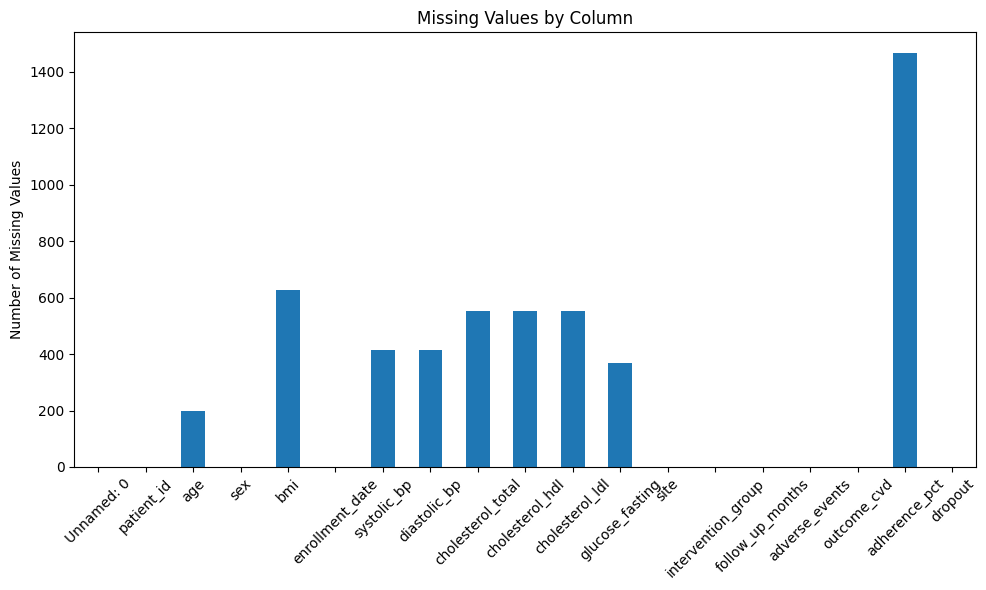

In [2]:
# TODO: Detect and analyze missing data
# 1. Use detect_missing(df) to get missing value counts
# 2. Calculate percentage of missing values per column  
# 3. Print both counts and percentages
# 4. Identify which columns have missing data

# Optional: Use the visualization function above to create a bar chart
# visualize_missing_data(missing_counts)
df = clean_data(df, sentinel_value = -999)
df = clean_data(df, sentinel_value = -1)

detect_missing_counts = detect_missing(df)
print(detect_missing_counts, "\n")

missing_percentages = (detect_missing_counts / len(df)) * 100
print(missing_percentages)

columns_with_missing = detect_missing_counts[detect_missing_counts > 0].index.tolist()
print(f"Columns with missing data: {columns_with_missing}")

visualize_missing_data(detect_missing_counts)

## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [3]:
# TODO: Compare imputation strategies
# Store original stats
missing_count = df['cholesterol_total'].isnull().sum()
original_mean = df['cholesterol_total'].mean()
original_median = df['cholesterol_total'].median()

# Apply all three strategies 
df_mean = fill_missing(df, 'cholesterol_total', strategy='mean')
df_median = fill_missing(df, 'cholesterol_total', strategy='median')
df_ffill = fill_missing(df, 'cholesterol_total', strategy='ffill')

# Create and display summary
summary = pd.DataFrame({
    'Strategy': ['Original', 'Mean', 'Median', 'Forward Fill'],
    'Mean': [
        original_mean,
        df_mean['cholesterol_total'].mean(),
        df_median['cholesterol_total'].mean(),
        df_ffill['cholesterol_total'].mean()
    ],
    'Median': [
        original_median,
        df_mean['cholesterol_total'].median(),
        df_median['cholesterol_total'].median(),
        df_ffill['cholesterol_total'].median()
    ],
    'Values Filled': [0, missing_count, missing_count, missing_count]
})

print(summary)

       Strategy        Mean      Median  Values Filled
0      Original  178.039488  177.000000              0
1          Mean  178.039488  178.039488            554
2        Median  177.981900  177.000000            554
3  Forward Fill  178.070500  177.000000            554


/workspaces/ds217-midterm-oscar-peng/q3_data_utils.py:96: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled[column] = df_filled[column].fillna(method='ffill')


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [4]:
# TODO: Drop missing rows with different strategies
dfDropped = df.dropna(axis=0)
print(f"Remaining number of rows after dropping missing rows: {len(dfDropped)}")

dfDropNaAgeBMI = df.dropna(subset=['age', 'bmi'], axis=0)
print(f"Remaining number of rows after dropping missing rows only in 'age' and 'bmi': {len(dfDropNaAgeBMI)}")

print("Dropping rows where only specific columns has missing data (e.g., 'age' and 'bmi') loses less data")


Remaining number of rows after dropping missing rows: 6843
Remaining number of rows after dropping missing rows only in 'age' and 'bmi': 9188
Dropping rows where only specific columns has missing data (e.g., 'age' and 'bmi') loses less data


## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

In [5]:
# List of numeric columns to impute
numeric_cols_to_impute = [
    'bmi', 
    'systolic_bp', 
    'diastolic_bp',
    'cholesterol_total', 
    'cholesterol_hdl', 
    'cholesterol_ldl',
    'glucose_fasting',
    'adherence_pct'
]

# Start with original data
df_clean = df.copy()

# Clean sentinel values first
df_clean = clean_data(df_clean, sentinel_value = -999)
df_clean = clean_data(df_clean, sentinel_value = -1)

# Impute all numeric columns with median
for col in numeric_cols_to_impute:
    df_clean = fill_missing(df_clean, col, strategy='median')
    print(f"Imputed {col} using median strategy")

# Check for missing critical values (patient_id, age)
critical_cols = ['patient_id', 'age']
missing_critical = df_clean[critical_cols].isnull().sum()
print(f"\nMissing critical values:")
print(missing_critical)

# Drop rows with missing critical values (if any)
rows_before = len(df_clean)
df_clean = df_clean.dropna(subset=critical_cols)
rows_after = len(df_clean)
rows_dropped = rows_before - rows_after
print(f"\nRows dropped due to missing critical values: {rows_dropped}")

# Verify no missing values remain
print(f"\nFinal missing values:")
print(df_clean.isnull().sum())

# Save cleaned dataset
df_clean.to_csv('output/q5_cleaned_data.csv', index=False)
print(f"\nCleaned dataset saved to output/q5_cleaned_data.csv")
print(f"Final dataset shape: {df_clean.shape}")

# Create and save missing data report
with open('output/q5_missing_report.txt', 'w') as f:
    f.write("MISSING DATA REPORT\n\n")
    
    f.write("ORIGINAL DATASET:\n")
    f.write(f"- Total rows: {len(df)}\n")
    f.write(f"- Total columns: {len(df.columns)}\n\n")

    f.write("Missing values by column (before cleaning):\n")
    f.write(detect_missing(df).to_string())
    f.write("\n\n")
    
    f.write("CLEANING STRATEGY:\n")
    f.write("- Imputed numeric columns using MEDIAN strategy\n")
    f.write(f"- Columns imputed: {', '.join(numeric_cols_to_impute)}\n")
    f.write(f"- Rows dropped with missing critical values: {rows_dropped}\n\n")
    
    f.write("FINAL DATASET:\n")
    f.write(f"- Total rows: {len(df_clean)}\n")
    f.write(f"- Total columns: {len(df_clean.columns)}\n\n")
    
    f.write("Missing values by column (after cleaning):\n")
    f.write(detect_missing(df_clean).to_string())

Imputed bmi using median strategy
Imputed systolic_bp using median strategy
Imputed diastolic_bp using median strategy
Imputed cholesterol_total using median strategy
Imputed cholesterol_hdl using median strategy
Imputed cholesterol_ldl using median strategy
Imputed glucose_fasting using median strategy
Imputed adherence_pct using median strategy

Missing critical values:
patient_id      0
age           200
dtype: int64

Rows dropped due to missing critical values: 200

Final missing values:


Unnamed: 0            0
patient_id            0
age                   0
sex                   0
bmi                   0
enrollment_date       0
systolic_bp           0
diastolic_bp          0
cholesterol_total     0
cholesterol_hdl       0
cholesterol_ldl       0
glucose_fasting       0
site                  0
intervention_group    0
follow_up_months      0
adverse_events        0
outcome_cvd           0
adherence_pct         0
dropout               0
dtype: int64

Cleaned dataset saved to output/q5_cleaned_data.csv
Final dataset shape: (9800, 19)


## Reflection

Which imputation strategy would you recommend for this dataset and why?

**Your answer:**

TODO: Explain your strategy choice

I recommend median imputation because, for example in looking at the cholesterol data, it perfectly preserves the original median (177.0) while minimally impacting the mean (178.04 → 177.98), demonstrating a very approach in comparison to the other approaches. The median would also be robust to extreme values unlike the mean. With missing values, using the median could allow us to avoid introducing bias. Forward fill is would be not suitable here because clinical trial data has no meaningful temporal order, making median imputation the best option in my opinion.